# SPAM E-MAIL CLASSIFICATION

**1.Problem defition**
>"Our team receive to much email spam, we only want legitimate email in our inbox. All incoming spams e-mail should be filtered out."

>How well can we classify the email that a company receive between spams and legitimate emails.
We are going the take raw emails and preprocess the text data. Then train a machine learning model that classifies the email as either spams or not spam.

**2.Data**
The data is downloaded from:https://spamassassin.apache.org/old/publiccorpus/

a description can be found here:https://spamassassin.apache.org/old/publiccorpus/readme.html 

**3.Evaluation**


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [4]:
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

sns.set(rc={'figure.figsize':(15,7)})
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import warnings
warnings.filterwarnings("ignore")

In [2]:
dir_path = r"D:\DataBases\DataSets\Appbrewery.co\SpamData\"

In [2]:
from os import walk
from os.path import join

import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup
from wordcloud import WordCloud
from PIL import Image
import numpy as np

from sklearn.model_selection import train_test_split

%matplotlib inline

# CONSTANTS

In [50]:
EXAMPLE_FILE = r"D:\DataBases\DataSets\Appbrewery.co\SpamData\01_Processing\practice_email.txt"

SPAM_1_PATH = r"D:/DataBases/DataSets/Appbrewery.co/SpamData/01_Processing/spam_assassin_corpus/spam_1"
SPAM_2_PATH = r"D:/DataBases/DataSets/Appbrewery.co/SpamData/01_Processing/spam_assassin_corpus/spam_2"
EASY_NON_SPAM_1_PATH = r"D:/DataBases/DataSets/Appbrewery.co/SpamData/01_Processing/spam_assassin_corpus/easy_ham_1"
EASY_NON_SPAM_2_PATH = r"D:/DataBases/DataSets/Appbrewery.co/SpamData/01_Processing/spam_assassin_corpus/easy_ham_2"

TOKEN_SPAM_PROB_FILE = r"D:/DataBases/DataSets/Appbrewery.co/SpamData/03_Testing/prob-spam.txt"
TOKEN_HAM_PROB_FILE = r"D:/DataBases/DataSets/Appbrewery.co/SpamData/03_Testing/prob-nonspam.txt"
TOKEN_ALL_PROB_FILE = r"D:/DataBases/DataSets/Appbrewery.co/SpamData/03_Testing/prob-all-tokens.txt"

TEST_FEATURE_MATRIX = r"D:/DataBases/DataSets/Appbrewery.co/SpamData/03_Testing/test-features.txt"
TEST_TARGET_FILE = r"D:/DataBases/DataSets/Appbrewery.co/SpamData/03_Testing/test-target.txt"

SPAM_CAT = 1
HAM_CAT = 0
VOCAB_SIZE = 2500

DATA_JSON_FILE = r"D:/DataBases/DataSets/Appbrewery.co/SpamData/01_Processing/email-text-data.json"
WORD_ID_FILE = r"D:/DataBases/DataSets/Appbrewery.co/SpamData/01_Processing/word-by-id.csv"

TRAINING_DATA_FILE = r"D:/DataBases/DataSets/Appbrewery.co/SpamData/02_Training/train-data.txt"
TEST_DATA_FILE = r"D:/DataBases/DataSets/Appbrewery.co/SpamData/02_Training/test-data.txt"

WHALE_FILE = r"D:/DataBases/DataSets/Appbrewery.co/SpamData/01_Processing/wordcloud_resources/whale-icon.png"
SKULL_FILE = r"D:/DataBases/DataSets/Appbrewery.co/SpamData/01_Processing/wordcloud_resources/skull-icon.png"
THUMBS_UP_FILE = r"D:/DataBases/DataSets/Appbrewery.co/SpamData/01_Processing/wordcloud_resources/thumbs-up.png"
THUMBS_DOWN_FILE = r"D:/DataBases/DataSets/Appbrewery.co/SpamData/01_Processing/wordcloud_resources/thumbs-down.png"
CUSTOM_FONT_FILE = r"D:/DataBases/DataSets/Appbrewery.co/SpamData/01_Processing/wordcloud_resources/OpenSansCondensed-Bold.ttf"

In [32]:
stream = open(EXAMPLE_FILE, encoding="latin-1")
message = stream.read()
stream.close()

print(message)

From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp

In [33]:
stream = open(EXAMPLE_FILE, encoding="latin-1")

is_body = False
lines=[]

for line in stream:
    if is_body:
        lines.append(line)
    elif line == '\n':
        is_body = True
        
stream.close()

email_body = '\n'.join(lines)
print(email_body)



Dear Mr Still



Good tidings to you and all your staff for the festive season ahead (Christmas).

Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.

But WAIT! You're probably thinking: "What makes him so special?"

Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.

You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.

I look forward to hearing from you.



Best wishes

Robin Cooper

[Excerpt from the book: The Timewaster Let

**GENERATOR FUNCTION**

In [7]:
def generate_squares(N):
    for my_number in range(N):
        yield my_number **2

In [8]:
for i in generate_squares(7):
    print(i, end=' ->')

0 ->1 ->4 ->9 ->16 ->25 ->36 ->

**E-MAIL BODY EXTRACTION**

In [9]:
def email_body_generator(path):
    
    for root, dirnames, filenames in walk(path):
        for file_name in filenames:
            
            filepath = join(root, file_name)
            
            stream = open(filepath, encoding='latin-1')

            is_body = False
            lines = []

            for line in stream:
                if is_body:
                    lines.append(line)
                elif line == '\n':
                    is_body = True

            stream.close()

            email_body = '\n'.join(lines)
            
            yield file_name, email_body


In [10]:
def df_from_directory(path, classification):
    rows = []
    row_names = []
    
    for file_name, email_body in email_body_generator(path):
        rows.append({'MESSAGE': email_body, 'CATEGORY': classification})
        row_names.append(file_name)
        
    return pd.DataFrame(rows, index=row_names)

In [11]:
spam_emails = df_from_directory(SPAM_1_PATH, SPAM_CAT)
spam_emails = spam_emails.append(df_from_directory(SPAM_2_PATH, SPAM_CAT))
spam_emails.head()

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


In [12]:
spam_emails.shape

(1898, 2)

In [13]:
ham_emails = df_from_directory(EASY_NON_SPAM_1_PATH, HAM_CAT)
ham_emails.head()

,MESSAGE,CATEGORY
00001.7c53336b37003a9286aba55d2945844c,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0
00002.9c4069e25e1ef370c078db7ee85ff9ac,"Martin A posted:\n\nTassos Papadopoulos, the G...",0
00003.860e3c3cee1b42ead714c5c874fe25f7,Man Threatens Explosion In Moscow \n\n\n\nThur...,0
00004.864220c5b6930b209cc287c361c99af1,Klez: The Virus That Won't Die\n\n \n\nAlready...,0
00005.bf27cdeaf0b8c4647ecd61b1d09da613,"> in adding cream to spaghetti carbonara, whi...",0


In [14]:
ham_emails.shape

(2501, 2)

In [15]:
ham_emails = df_from_directory(EASY_NON_SPAM_1_PATH, HAM_CAT)
ham_emails = ham_emails.append(df_from_directory(EASY_NON_SPAM_2_PATH, HAM_CAT))
ham_emails.head()

,MESSAGE,CATEGORY
00001.7c53336b37003a9286aba55d2945844c,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0
00002.9c4069e25e1ef370c078db7ee85ff9ac,"Martin A posted:\n\nTassos Papadopoulos, the G...",0
00003.860e3c3cee1b42ead714c5c874fe25f7,Man Threatens Explosion In Moscow \n\n\n\nThur...,0
00004.864220c5b6930b209cc287c361c99af1,Klez: The Virus That Won't Die\n\n \n\nAlready...,0
00005.bf27cdeaf0b8c4647ecd61b1d09da613,"> in adding cream to spaghetti carbonara, whi...",0


In [16]:
ham_emails.shape

(3901, 2)

In [17]:
data = pd.concat([spam_emails, ham_emails])
print("They entire dataframe is", data.shape)
data.head()

They entire dataframe is (5799, 2)


,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


# 1.DATA CLEANING

In [18]:
data["MESSAGE"].isnull().values.any()

False

In [19]:
my_var = None

In [20]:
#To check if there are empty emails(string length zero)
(data.MESSAGE.str.len() == 0).any()

True

In [21]:
(data.MESSAGE.str.len() == 0).sum()

3

In [22]:
#To check null values
data["MESSAGE"].isnull().sum()

0

In [23]:
#To locate emplty email
data[data.MESSAGE.str.len() == 0].index

Index(['cmds', 'cmds', 'cmds'], dtype='object')

In [24]:
data = data.drop("cmds")

In [25]:
#To locate emplty email
data[data.MESSAGE.str.len() == 0].index

Index([], dtype='object')

In [26]:
data.shape

(5796, 2)

**ADD Document ID**

In [27]:
document_ids = range(0, len(data.index))
data["DOC_ID"] = document_ids 

In [28]:
data.DOC_ID

00001.7848dde101aa985090474a91ec93fcf0       0
00002.d94f1b97e48ed3b553b3508d116e6a09       1
00003.2ee33bc6eacdb11f38d052c44819ba6c       2
00004.eac8de8d759b7e74154f142194282724       3
00005.57696a39d7d84318ce497886896bf90d       4
00006.5ab5620d3d7c6c0db76234556a16f6c1       5
00007.d8521faf753ff9ee989122f6816f87d7       6
00008.dfd941deb10f5eed78b1594b131c9266       7
00009.027bf6e0b0c4ab34db3ce0ea4bf2edab       8
00010.445affef4c70feec58f9198cfbc22997       9
00011.61816b9ad167657773a427d890d0468e      10
00012.381e4f512915109ba1e0853a7a8407b2      11
00013.d3f0b591a65f116ea5d9d4ad919f83aa      12
00014.7d38c46424f24fc8012ac15a95a2ac14      13
00015.048434ab64c86cf890eda1326a5643f5      14
00016.67fb281761ca1051a22ec3f21917e7c0      15
00017.1a938ecddd047b93cbd7ed92c241e6d1      16
00018.5b2765c42b7648d41c93b9b27140b23a      17
00019.bbc97ad616ffd06e93ce0f821ca8c381      18
00020.29725cf331fc21e18a1809e7d8b27332      19
00021.effe1449462a9d7ad7af0f1c94b1a237      20
00022.8203cdf

In [29]:
data["FILE_NAME"] = data.index
data.set_index("DOC_ID", inplace=True)
data.head(2)

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09


**SAVE THE DATA FRAME AS J_SON FILE**

In [32]:
data.to_json(r'D:/DataBases/DataSets/Appbrewery.co/DATA_JSON_FILE')

In [6]:
data_back_up = pd.read_json(r'D:/DataBases/DataSets/Appbrewery.co/DATA_JSON_FILE')
data = data_back_up.copy()

# 2.EDA

In [11]:
data.CATEGORY.value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

In [12]:
nber_of_spams = data.CATEGORY.value_counts()[1] 
nber_of_hams = data.CATEGORY.value_counts()[0] 

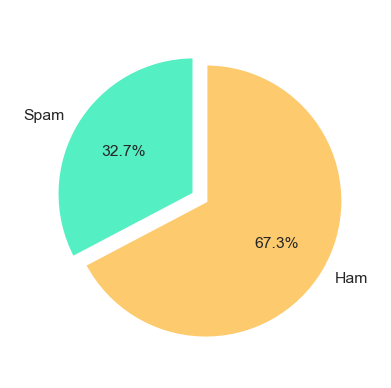

In [13]:
category_names = ["Spam", "Ham"]
sizes = [nber_of_spams, nber_of_hams]

custom_colours = ["#55efc4", "#fdcb6e"]
explode = (0, 0.1)
plt.figure(figsize=(2, 2), dpi= 227)
plt.pie(sizes, labels= category_names, textprops={"fontsize": 5}, 
        explode=explode,shadow=False, startangle=90, autopct="%1.1f%%", colors=custom_colours)
plt.show()

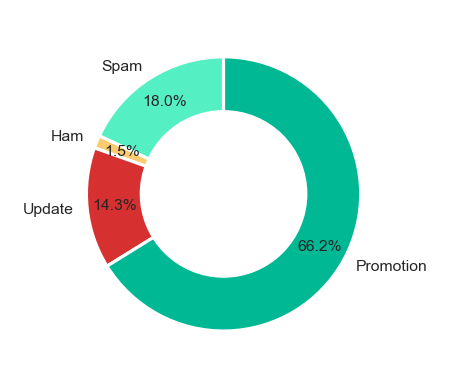

In [15]:
category_names = ["Spam", "Ham", "Update", "Promotion"]
sizes = [24, 2, 19, 88]
custom_colours = ["#55efc4", "#fdcb6e", "#d63031", "#00b894"]
offset = [0.05, 0.05, 0.05, 0.05]

explode = (0, 0, 0, 0)
plt.figure(figsize=(2, 2), dpi= 227)
plt.pie(sizes, labels= category_names, textprops={"fontsize": 5}, 
        explode=explode,shadow=False, startangle=90, autopct="%1.1f%%",
        colors=custom_colours, pctdistance=0.8)

#draw circle
centre_circle = plt.Circle((0, 0), radius=0.6, fc="white")
plt.gca().add_artist(centre_circle)

plt.show()

# 3.NATURAL LANGUAGE PREPROCESSING

**TEXT PREPROCESSING**

In [5]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nherm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**TOKENISING**

In [18]:
msg = "All work and no play makes Jack a dull boy. To be or not to be."

In [19]:
msg = "All work and no play makes Jack a dull boy. To be or not to be."
word_tokenize(msg.lower())

['all',
 'work',
 'and',
 'no',
 'play',
 'makes',
 'jack',
 'a',
 'dull',
 'boy',
 '.',
 'to',
 'be',
 'or',
 'not',
 'to',
 'be',
 '.']

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('gutenberg')
nltk.download('shakespeare')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nherm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nherm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\nherm\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package shakespeare to
[nltk_data]     C:\Users\nherm\AppData\Roaming\nltk_data...
[nltk_data]   Package shakespeare is already up-to-date!


True

**REMOVING STOP WORD**

In [23]:
stop_words = set(stopwords.words("english"))

In [24]:
if "Hello" in stop_words:print ("Found it!")
if "Hello" not in  stop_words:print ("Nope. Not in here!")

Nope. Not in here!


In [25]:
words = word_tokenize(msg.lower())

filtered_words = []
for word in words:
    if word not in stop_words:
        filtered_words.append(word)
print(filtered_words)

['work', 'play', 'makes', 'jack', 'dull', 'boy', '.', '.']


**WORD STEM AND WORD STEMMING**  

In [26]:
#makes wes stemmed to make
words = word_tokenize(msg.lower())

stemmer = PorterStemmer()

filtered_words = []
for word in words:
    if word not in stop_words:
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)
print(filtered_words)

['work', 'play', 'make', 'jack', 'dull', 'boy', '.', '.']


**REMOVE PUNCTUATION**

In [27]:
msg = "All work and no play makes Jack a dull boy. To be or not to be???\
Nobody expects the Spanish Inquisition!"

words = word_tokenize(msg.lower())
stemmer = SnowballStemmer("english")
filtered_words = []

for word in words:
    if word not in stop_words and word.isalpha():
        stemmed_word = stemmer.stem(word)
        filtered_words.append(stemmed_word)
print(filtered_words)

['work', 'play', 'make', 'jack', 'dull', 'boy', 'nobodi', 'expect', 'spanish', 'inquisit']


**REMOVE HTML TAGS FROM EMAILS**

In [28]:
soup = BeautifulSoup(data.at[2, "MESSAGE"], "html.parser")
print(soup.prettify())

1) Fight The Risk of Cancer!

http://www.adclick.ws/p.cfm?o=315&amp;s=pk007



2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days

http://www.adclick.ws/p.cfm?o=249&amp;s=pk007



3) Get the Child Support You Deserve - Free Legal Advice

http://www.adclick.ws/p.cfm?o=245&amp;s=pk002



4) Join the Web's Fastest Growing Singles Community

http://www.adclick.ws/p.cfm?o=259&amp;s=pk007



5) Start Your Private Photo Album Online!

http://www.adclick.ws/p.cfm?o=283&amp;s=pk007



Have a Wonderful Day,

Offer Manager

PrizeMama



























If you wish to leave this list please use the link below.

http://www.qves.com/trim/?zzzz@spamassassin.taint.org%7C17%7C308417



In [29]:
soup.get_text()

"1) Fight The Risk of Cancer!\n\nhttp://www.adclick.ws/p.cfm?o=315&s=pk007\n\n\n\n2) Slim Down - Guaranteed to lose 10-12 lbs in 30 days\n\nhttp://www.adclick.ws/p.cfm?o=249&s=pk007\n\n\n\n3) Get the Child Support You Deserve - Free Legal Advice\n\nhttp://www.adclick.ws/p.cfm?o=245&s=pk002\n\n\n\n4) Join the Web's Fastest Growing Singles Community\n\nhttp://www.adclick.ws/p.cfm?o=259&s=pk007\n\n\n\n5) Start Your Private Photo Album Online!\n\nhttp://www.adclick.ws/p.cfm?o=283&s=pk007\n\n\n\nHave a Wonderful Day,\n\nOffer Manager\n\nPrizeMama\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nIf you wish to leave this list please use the link below.\n\nhttp://www.qves.com/trim/?zzzz@spamassassin.taint.org%7C17%7C308417\n\n\n"

**FUNCTION FOR EMAIL PREPROCESSING**

In [30]:
def clean_message(message, stemmer=PorterStemmer(),
                 stop_words = set(stopwords.words("english"))):
    #Converts to lower case and splits up the words
    words = word_tokenize(message.lower())
    filtered_words = []
    
    for word in words:
        #Remove the stop words and punctuation
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
    
    return filtered_words

In [34]:
clean_message(email_body)

['dear',
 'mr',
 'still',
 'good',
 'tide',
 'staff',
 'festiv',
 'season',
 'ahead',
 'christma',
 'crux',
 'fulli',
 'qualifi',
 'santa',
 'clau',
 'wonder',
 'whether',
 'might',
 'consid',
 'run',
 'santa',
 'grotto',
 'store',
 'wait',
 'probabl',
 'think',
 'make',
 'special',
 'well',
 'first',
 'made',
 'sever',
 'chang',
 'characteris',
 'father',
 'christma',
 'rather',
 'greet',
 'children',
 'shout',
 'ho',
 'ho',
 'ho',
 'prefer',
 'whisper',
 'phrase',
 'depend',
 'unfathom',
 'cruel',
 'world',
 'live',
 'addit',
 'gift',
 'rang',
 'felt',
 'hoop',
 'holder',
 'note',
 'also',
 'enclos',
 'sketch',
 'radic',
 'redesign',
 'santa',
 'outfit',
 'renam',
 'charact',
 'lord',
 'buckl',
 'would',
 'interest',
 'employ',
 'promis',
 'never',
 'let',
 'look',
 'forward',
 'hear',
 'best',
 'wish',
 'robin',
 'cooper',
 'excerpt',
 'book',
 'timewast',
 'letter',
 'robin',
 'cooper']

In [162]:
def clean_message_no_html(message, stemmer=PorterStemmer(),
                 stop_words = set(stopwords.words("english"))):
    
    #Remove HTML tags
    soup = BeautifulSoup(message, "html.parser")
    leaned_text = soup.get_text()
    #Converts to lower case and splits up the words
    words = word_tokenize(message.lower())
    filtered_words = []
    for word in words:
        #Remove the stop words and punctuation
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
    
    return filtered_words

In [50]:
clean_message_no_html(data.at[2, "MESSAGE"])

['fight',
 'risk',
 'cancer',
 'http',
 'slim',
 'guarante',
 'lose',
 'lb',
 'day',
 'http',
 'get',
 'child',
 'support',
 'deserv',
 'free',
 'legal',
 'advic',
 'http',
 'join',
 'web',
 'fastest',
 'grow',
 'singl',
 'commun',
 'http',
 'start',
 'privat',
 'photo',
 'album',
 'onlin',
 'http',
 'wonder',
 'day',
 'offer',
 'manag',
 'prizemama',
 'wish',
 'leav',
 'list',
 'pleas',
 'use',
 'link',
 'http',
 'zzzz']

# 4.APPLY CLEANING AND TOKENISATION TO ALL MESSAGES 

**SLICING DATAFRAME AND SERIES AND CREATING SUBSETS** 

In [35]:
data.iat[2, 2]

'00003.2ee33bc6eacdb11f38d052c44819ba6c'

In [36]:
data.iloc[0:2]

,MESSAGE,CATEGORY,FILE_NAME
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09


In [37]:
first_emails = data.MESSAGE.iloc[0:5]

nested_list = first_emails.apply(clean_message)

In [38]:
flat_list = []
for sublist in nested_list:
    for item in sublist:
        flat_list.append(item)
len(flat_list)        

571

In [39]:
flat_list = [item for sublist in nested_list for item in sublist]
len(flat_list)
flat_list

['doctyp',
 'html',
 'public',
 'html',
 'html',
 'head',
 'meta',
 'ype',
 'meta',
 'mshtml',
 'bodi',
 'insert',
 'calypso',
 'tabl',
 'color',
 'black',
 'display',
 'none',
 'tbodi',
 'tr',
 'td',
 'hr',
 'noshad',
 'tr',
 'td',
 'hr',
 'noshad',
 'end',
 'calypso',
 'insert',
 'font',
 'arial',
 'helvetica',
 'br',
 'end',
 'calypso',
 'font',
 'copperpl',
 'gothic',
 'bold',
 'center',
 'save',
 'life',
 'font',
 'copperpl',
 'gothic',
 'bold',
 'center',
 'spend',
 'center',
 'font',
 'copperpl',
 'gothic',
 'bold',
 'center',
 'life',
 'quot',
 'save',
 'center',
 'p',
 'p',
 'br',
 'p',
 'center',
 'tabl',
 'tbodi',
 'tabl',
 'tbodi',
 'tr',
 'td',
 'b',
 'font',
 'g',
 'famili',
 'financi',
 'secur',
 'import',
 'life',
 'quot',
 'save',
 'ke',
 'buy',
 'life',
 'insur',
 'simpl',
 'afford',
 'provid',
 'free',
 'access',
 'best',
 'compani',
 'lowest',
 'tr',
 'td',
 'tabl',
 'tbodi',
 'tr',
 'td',
 'font',
 'b',
 'life',
 'quot',
 'save',
 'fast',
 'save',
 'money',
 'let',

In [42]:
%%time
#
nested_list = data.MESSAGE.apply(clean_message_no_html)

Wall time: 1min 39s


In [43]:
nested_list.head()

0    [doctyp, html, public, html, html, head, meta,...
1    [fight, risk, cancer, http, slim, guarante, lo...
2    [fight, risk, cancer, http, slim, guarante, lo...
3    [adult, club, offer, free, membership, instant...
4    [thought, might, like, slim, guarante, lose, l...
Name: MESSAGE, dtype: object

**USE LOGIC TO SLICE DATA**

In [44]:
data[data.CATEGORY==1].shape

(1896, 3)

In [45]:
data[data.CATEGORY==0].head()

,MESSAGE,CATEGORY,FILE_NAME
1896,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0,00001.7c53336b37003a9286aba55d2945844c
1897,"Martin A posted:\n\nTassos Papadopoulos, the G...",0,00002.9c4069e25e1ef370c078db7ee85ff9ac
1898,Man Threatens Explosion In Moscow \n\n\n\nThur...,0,00003.860e3c3cee1b42ead714c5c874fe25f7
1899,Klez: The Virus That Won't Die\n\n \n\nAlready...,0,00004.864220c5b6930b209cc287c361c99af1
1900,"> in adding cream to spaghetti carbonara, whi...",0,00005.bf27cdeaf0b8c4647ecd61b1d09da613


In [46]:
#Create variable that store the index of spams and hams messages
doc_ids_spam = data[data.CATEGORY == 1].index
doc_ids_ham = data[data.CATEGORY == 0].index

**SUBSETING SERIE WITH INDEX**

In [47]:
nested_list_spam = nested_list.loc[doc_ids_spam]
nested_list_ham = nested_list.loc[doc_ids_ham]

In [48]:
nested_list_ham.shape

(3900,)

In [49]:
nested_list_spam.head()

0    [doctyp, html, public, html, html, head, meta,...
1    [fight, risk, cancer, http, slim, guarante, lo...
2    [fight, risk, cancer, http, slim, guarante, lo...
3    [adult, club, offer, free, membership, instant...
4    [thought, might, like, slim, guarante, lose, l...
Name: MESSAGE, dtype: object

In [50]:
#Use python list comprehension and find the total number of words in the clean dataset of spam email bodies
flat_list_ham = [item for sublist in nested_list_ham for item in sublist]
normal_words = pd.Series(flat_list_ham)

normal_words.shape[0]#total number of words 

445962

In [51]:
flat_list_ham = [item for sublist in nested_list_ham for item in sublist]
normal_words = pd.Series(flat_list_ham).value_counts()

normal_words.shape[0]#total number of words unique words in ham messages 

20904

In [52]:
#To find the 10 most common words used in ham messages.
normal_words[:10]

http      7959
use       3637
list      2886
one       2377
get       2287
mail      2259
would     2005
like      1929
messag    1855
work      1798
dtype: int64

In [53]:
#To find the 10 most common words in spam messages
flat_list_spam = [item for sublist in nested_list_spam for item in sublist]
spammy_words = pd.Series(flat_list_spam)

print(f"There are {spammy_words.shape[0]} words in the spam messages")#total number of words in spam messages

There are 482647 words in the spam messages


In [54]:
#To find the 10 most common words in spam messages
flat_list_spam = [item for sublist in nested_list_spam for item in sublist]
spammy_words = pd.Series(flat_list_spam).value_counts()

print(f"There are {spammy_words.shape[0]} unique words in the spam messages")

There are 13882 unique words in the spam messages


In [55]:
#To find the 10 most common words used in spam messages.
spammy_words[:10]

font      20520
br        19865
nbsp      11254
http      10705
td        10654
b          7446
p          7237
arial      6631
tr         6365
center     4724
dtype: int64

# 5.CREATING WORD CLOUD

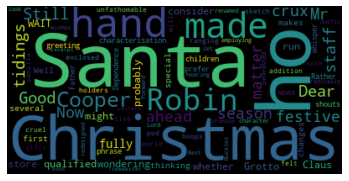

In [83]:
word_cloud = WordCloud().generate(email_body)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [84]:
#Pull out the book melville-moby_dick from Gutenberg words
example_corpus = nltk.corpus.gutenberg.words('melville-moby_dick.txt')
len(example_corpus)

260819

In [85]:
example_corpus

['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', ...]

In [86]:
#To create a word list by joining all words
word_list = [''.join(word) for word in example_corpus]
#Take each words out of the list and create a single string
novel_as_string = ' '.join(word_list)

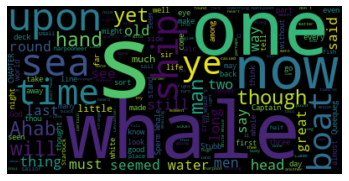

In [87]:
word_cloud = WordCloud().generate(novel_as_string)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

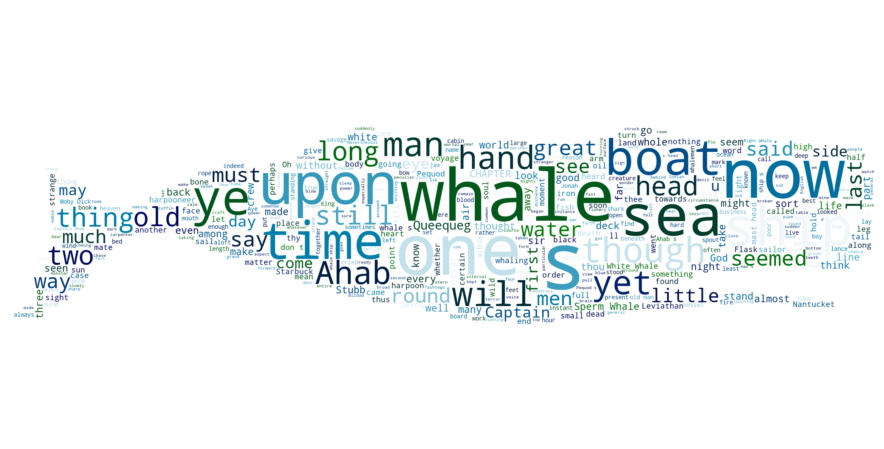

In [90]:
icon = Image.open(WHALE_FILE)
image_mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))
image_mask.paste(icon, box=icon)

rgb_array = np.array(image_mask) # converts the image object to an array

word_cloud = WordCloud(mask=rgb_array, background_color='white', 
                      max_words=400, colormap='ocean')

word_cloud.generate(novel_as_string)

plt.figure(figsize=[16, 8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [96]:
#Pull out the book melville-moby_dick from Gutenberg words
example_corpus = nltk.corpus.gutenberg.words('Shakespeare-Hamlet.txt')
len(example_corpus)

37360

In [97]:
#To create a word list by joining all words
word_list = [''.join(word) for word in example_corpus]
#Take each words out of the list and create a single string
novel_as_string = ' '.join(word_list)

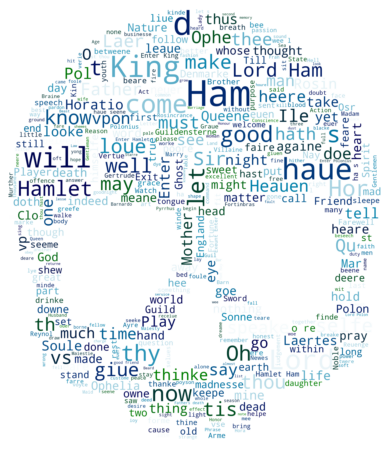

In [99]:
#Use the skull image in the lesson resources to create a word cloud for Shakespeare's play Hamlet
skull_icon = Image.open(SKULL_FILE)
image_mask = Image.new(mode='RGB', size=skull_icon.size, color=(255, 255, 255))
image_mask.paste(skull_icon, box=skull_icon)

rgb_array = np.array(image_mask) # converts the image object to an array

word_cloud = WordCloud(mask=rgb_array, background_color='white', 
                      max_words=400, colormap='ocean')

word_cloud.generate(novel_as_string)

plt.figure(figsize=[16, 8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**WORD CLOUD FOR SPAM AND HAM MESSAGES**

**HAM MESSAGES**

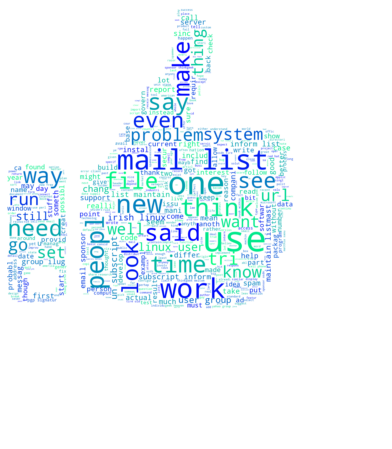

In [102]:

thumbs_up_icon = Image.open(THUMBS_UP_FILE)
image_mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))
image_mask.paste(thumbs_up_icon, box=thumbs_up_icon)

rgb_array = np.array(image_mask) # converts the image object to an array

# Generate the text as a string for the word cloud
ham_str = ' '.join(flat_list_ham)

word_cloud = WordCloud(mask=rgb_array, background_color='white', 
                      max_words=500, colormap='winter')

word_cloud.generate(ham_str)

plt.figure(figsize=[16, 8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**SPAM MESSAGES**

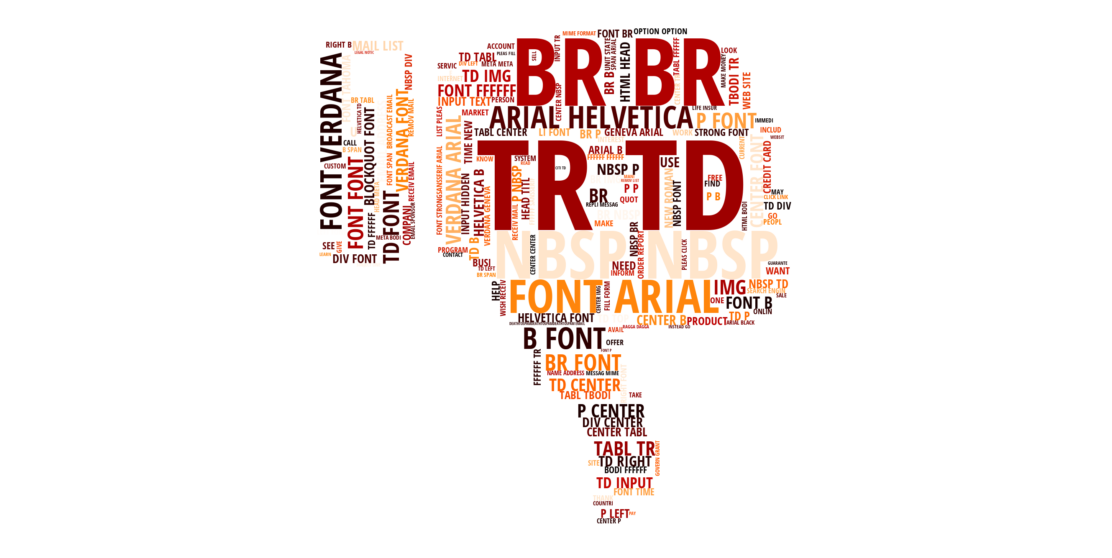

In [58]:
thumbs_down_icon = Image.open(THUMBS_DOWN_FILE)
image_mask = Image.new(mode='RGB', size=thumbs_down_icon.size, color=(255, 255, 255))
image_mask.paste(thumbs_down_icon, box=thumbs_down_icon)

rgb_array = np.array(image_mask) # converts the image object to an array

# Generate the text as a string for the word cloud
spam_str = ' '.join(flat_list_spam)

word_cloud = WordCloud(mask=rgb_array, background_color='white', max_font_size=300,
                      max_words=2000, colormap='gist_heat', font_path=CUSTOM_FONT_FILE)

word_cloud.generate(spam_str.upper())

plt.figure(figsize=[20, 10])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 6.VOCABULARY DICTIONNARY

In [155]:
def clean_message_no_html(message, stemmer=PorterStemmer(),
                 stop_words = set(stopwords.words("english"))):
    
    #Remove HTML tags
    soup = BeautifulSoup(message, "html.parser")
    leaned_text = soup.get_text()
    #Converts to lower case and splits up the words
    words = word_tokenize(message.lower())
    filtered_words = []
    for word in words:
        #Remove the stop words and punctuation
        if word not in stop_words and word.isalpha():
            #filtered_words.append(stemmer.stem(word))
            filtered_words.append(word) 
            
    return filtered_words

In [62]:
stemmed_nested_list = data.MESSAGE.apply(clean_message_no_html)
flat_stemmed_list = [item for sublist in stemmed_nested_list for item in sublist]

In [63]:
unique_words = pd.Series(flat_stemmed_list).value_counts()
print('Number of unique words', unique_words.shape[0])
unique_words.head()

Number of unique words 27856


font    20755
br      20096
http    18664
nbsp    11420
td      10737
dtype: int64

In [65]:
#Create subset of the series called 'frequent_words' that only contains the most common 2,500 words out of the total. Print out the top 10 words
frequent_words = unique_words[0:VOCAB_SIZE]
print('Most common words: \n', frequent_words[:10])

Most common words: 
 font     20755
br       20096
http     18664
nbsp     11420
td       10737
b         7610
p         7458
arial     6688
tr        6430
use       5033
dtype: int64


**CREATE VOCABULARY DataFrame WITH A WORD_ID**

In [70]:
word_ids = list(range(0, VOCAB_SIZE))
vocab = pd.DataFrame({'VOCAB_WORD': frequent_words.index.values}, index=word_ids)
vocab.index.name = 'WORD_ID'
vocab.head()

,VOCAB_WORD
WORD_ID,
0,font
1,br
2,http
3,nbsp
4,td


**SAVE VOCAB_WORD AS CSV FILE**

In [74]:
vocab.to_csv(WORD_ID_FILE, index_label=vocab.index.name, header=vocab.VOCAB_WORD.name)
#vocab.to_csv(WORD_ID_FILE, index_label="WORD_ID", header="VOCAB_WORD")

In [ ]:
#To read csv file
vocab = pd.read_csv(WORD_ID_FILE)

In [75]:
#Write a line of code that checks if a particular word is part of the vocabulary
#Your code should return True if the word is among the 2,500 words that comprise the vocabulary, and False otherwise
any(vocab.VOCAB_WORD == 'machine')

False

In [78]:
'learning' in set(vocab.VOCAB_WORD)

False

**FIND THE EMAIL WITH THE MOST NUMBER OF WORDS**

In [81]:
#Print out the number of words in the longest email (after cleaning & stemming)
# For loop
clean_email_lengths = []
for sublist in stemmed_nested_list:
    clean_email_lengths.append(len(sublist))
    
# Python List Comprehension
clean_email_lengths = [len(sublist) for sublist in stemmed_nested_list]
print('Number of words in the longest email is:', max(clean_email_lengths))   

Number of words in the longest email is: 7719


In [82]:
#Note the longest email's position in the list of cleaned emails
print('Email position in the list (and the data dataframe)', np.argmax(clean_email_lengths))

Email position in the list (and the data dataframe) 5775


In [83]:
#Print out the stemmed list of words in the longest email
stemmed_nested_list[np.argmax(clean_email_lengths)]

['yahoo',
 'group',
 'sponsor',
 'dvd',
 'free',
 'p',
 'join',
 'http',
 'new',
 'version',
 'unison',
 'avail',
 'test',
 'incorpor',
 'sever',
 'small',
 'improv',
 'main',
 'chang',
 'fix',
 'bug',
 'potenti',
 'seriou',
 'safeti',
 'consequ',
 'small',
 'number',
 'user',
 'habit',
 'run',
 'one',
 'instanc',
 'unison',
 'time',
 'parallel',
 'user',
 'strongli',
 'encourag',
 'upgrad',
 'other',
 'wait',
 'wish',
 'releas',
 'includ',
 'execut',
 'linux',
 'solari',
 'window',
 'look',
 'maintain',
 'moment',
 'none',
 'activ',
 'develop',
 'regularli',
 'use',
 'unison',
 'window',
 'machin',
 'configur',
 'properli',
 'build',
 'execut',
 'export',
 'grab',
 'http',
 'enjoy',
 'benjamin',
 'chang',
 'sinc',
 'ad',
 'prefer',
 'maxthread',
 'use',
 'limit',
 'number',
 'simultan',
 'file',
 'transfer',
 'ad',
 'backupdir',
 'prefer',
 'control',
 'backup',
 'file',
 'store',
 'basic',
 'support',
 'ad',
 'osx',
 'particular',
 'unison',
 'recogn',
 'one',
 'host',
 'synchron',
 

In [84]:
#We Print out the longest email from the data dataframe
data.at[np.argmax(clean_email_lengths), 'MESSAGE']

'------------------------ Yahoo! Groups Sponsor ---------------------~-->\n\n4 DVDs Free +s&p Join Now\n\nhttp://us.click.yahoo.com/pt6YBB/NXiEAA/Ey.GAA/26EolB/TM\n\n---------------------------------------------------------------------~->\n\n\n\nA new version of unison is now available for testing.  It incorporates\n\nseveral small improvements over 2.9.1, but the main change is a fix to\n\na bug that had potentially serious safety consequences, but only for\n\nthe very small number of users that are in the habit of running more\n\nthan one instance of Unison at a time, in parallel.  These users are\n\nstrongly encouraged to upgrade.  Others can wait if they wish.\n\n\n\nThe release includes pre-built executables for Linux and Solaris, but\n\nnot Windows.  (We are looking for a Unison-Windows maintainer -- at\n\nthe moment, none of the active developers are regularly using Unison\n\non Windows, and we do not have a machine that is configured properly\n\nfor building executables for exp

# 7.GENERATE FEATURES & A SPARSE MATRIX

**CREATING A DataFrame WITH ONE WORD PER COLUMN**

| DOC_ID        | WORD          | LABEL  | OCC  |
| ------------- |:-------------:|:------:|------:
| 5795          | "right"       |  0     |   3  |
| 5575          | "centered"    |  0     |   0  |
| 5795          | "neat"        |  0     |   1  |
| 5795          |  "away"       |  0     |   0  |



|   DOC_ID      | WORD          | LABEL |  OCC |
| ------------- |:-------------:|:-----:|------:
|  5795         | "right"       |  0    |   3  |
|  5795         | "neat"        |  0    |   1  |   

In [85]:
pd.options.display.max_columns = 100
#Full matrix vs sparse matrix
word_columns_df = pd.DataFrame.from_records(stemmed_nested_list.tolist())
word_columns_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,7669,7670,7671,7672,7673,7674,7675,7676,7677,7678,7679,7680,7681,7682,7683,7684,7685,7686,7687,7688,7689,7690,7691,7692,7693,7694,7695,7696,7697,7698,7699,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709,7710,7711,7712,7713,7714,7715,7716,7717,7718
0,doctyp,html,public,html,html,head,meta,ype,meta,mshtml,bodi,insert,calypso,tabl,color,black,display,none,tbodi,tr,td,hr,noshad,tr,td,hr,noshad,end,calypso,insert,font,arial,helvetica,br,end,calypso,font,copperpl,gothic,bold,center,save,life,font,copperpl,gothic,bold,center,spend,center,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,get,child,support,deserv,free,legal,advic,http,join,web,fastest,grow,singl,commun,http,start,privat,photo,album,onlin,http,wonder,day,offer,manag,prizemama,wish,leav,list,pleas,use,link,http,ilug,irish,linux,user,group,ilug,http,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,fight,risk,cancer,http,slim,guarante,lose,lb,day,http,get,child,support,deserv,free,legal,advic,http,join,web,fastest,grow,singl,commun,http,start,privat,photo,album,onlin,http,wonder,day,offer,manag,prizemama,wish,leav,list,pleas,use,link,http,zzzz,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,adult,club,offer,free,membership,instant,access,site,user,name,password,user,name,zzzz,password,best,adult,site,internet,free,news,million,member,sign,free,last,month,new,member,one,yet,membership,faq,offer,free,access,adult,membership,site,free,advertis,pay,ad,space,pay,membership,true,membership,life,absolut,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,thought,might,like,slim,guarante,lose,lb,day,http,fight,risk,cancer,http,get,child,support,deserv,free,legal,advic,http,offer,manag,wish,leav,list,pleas,use,link,http,social,irish,linux,user,group,social,event,social,http,un,subscript,inform,list,maintain,listmast,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [86]:
word_columns_df.shape

(5796, 7719)

# 8.SPLITTING THE DATA INTO A TRAINING AND TESTING DATASET

In [87]:
X_train, X_test, y_train, y_test = train_test_split(word_columns_df, data.CATEGORY, 
                                                    test_size=0.3, 
                                                    random_state=88)

In [94]:
print('Number of training samples', X_train.shape[0])
print(f"The fraction of training set is:{(X_train.shape[0] / word_columns_df.shape[0])*100:.0f}%")

Number of training samples 4057
The fraction of training set is:70%


In [95]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,7669,7670,7671,7672,7673,7674,7675,7676,7677,7678,7679,7680,7681,7682,7683,7684,7685,7686,7687,7688,7689,7690,7691,7692,7693,7694,7695,7696,7697,7698,7699,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709,7710,7711,7712,7713,7714,7715,7716,7717,7718
1998,paul,linehan,mailto,plinehan,two,open,altern,think,appear,mention,elsewher,thread,one,firebird,person,favourit,http,purchas,support,contract,indeedi,never,even,heard,firebird,start,new,job,last,week,client,use,pop,onto,box,downstair,wow,fast,come,love,client,tool,also,support,db,goodi,transact,store,procedur,trigger,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2841,late,got,feel,exmh,get,slower,slower,decid,check,realiti,ye,speed,left,scene,somewher,releas,check,number,small,messag,big,folder,msg,delay,next,button,increas,consider,msec,latest,cv,msec,frankli,think,get,close,sinc,user,set,chang,anybodi,idea,perform,disappear,mail,list,http,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1345,html,head,meta,bodi,ffffff,tabl,center,tr,td,top,http,img,http,td,http,img,http,tr,td,top,font,arial,helvetica,b,font,verdana,arial,helvetica,give,first,tube,bodi,sculptur,font,free,br,font,let,us,bill,credit,card,ship,handl,send,first,bottl,bodi,sculptur,free,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4196,url,http,date,last,person,leav,tori,parti,pleas,turn,light,scour,land,look,conserv,voter,quizz,crossword,interact,guid,steve,bell,weblog,news,comment,launch,new,http,http,http,http,http,http,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
261,messag,mime,format,free,lesson,http,choos,titl,learn,new,skill,hour,compar,quick,easi,free,get,comput,learn,video,professor,subject,choic,year,video,professor,taught,million,peopl,use,comput,teach,free,get,free,lesson,today,http,simpl,see,get,way,learn,play,like,video,comput,screen,complet,comprehens,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [96]:
y_train.head()

1998    0
2841    0
1345    1
4196    0
261     1
Name: CATEGORY, dtype: int64

**CREATE A SPARSE MATRIX FOR THE TRAINING DATA**

In [97]:
word_index = pd.Index(vocab.VOCAB_WORD)
type(word_index[24])

str

**.Doc_ID: Index of the message**
    
**.Word_ID: Index of the word** 

In [99]:
word_index.get_loc("html")

66

|   DOC_ID      | 0             | 1     |  2   |      
| ------------- |:-------------:|:-----:|------:
|  4844         |  jul          |rodent |right |



| DOC_ID        | WORD_ID       | LABEL  | OCC  |
| ------------- |:-------------:|:------:|------:
| 4844          |  395          |  0     |   3  |
| 4844          |  494          |  0     |   0  |
| 4844          |  2386         |  0     |   1  |


.X_train$[0]$ to get the first word of the X-train data set. which is `jul` and has a word doc_id of 4844.<br>
.y_train$[4844]$ to get the label of the word that has a doc_id 4844. `0` for ham and `1` for spam.<br>
.word_index.get_loc$["thu"]$ to get the word index which has the osition 395.<br> 

In [100]:
def make_sparse_matrix(df, indexed_words, labels):
    """
    Returns sparse matrix as dataframe.
    
    df: A dataframe with words in the columns with a document id as an index (X_train or X_test)
    indexed_words: index of words ordered by word id
    labels: category as a series (y_train or y_test)
    """
    
    nr_rows = df.shape[0]
    nr_cols = df.shape[1]
    word_set = set(indexed_words)
    dict_list = []
    
    for i in range(nr_rows):
        for j in range(nr_cols):
            
            word = df.iat[i, j]
            if word in word_set:
                doc_id = df.index[i]
                word_id = indexed_words.get_loc(word)
                category = labels.at[doc_id]
                
                item = {'LABEL': category, 'DOC_ID': doc_id,
                       'OCCURENCE': 1, 'WORD_ID': word_id}
                
                dict_list.append(item)
    
    return pd.DataFrame(dict_list)

In [101]:
%%time
sparse_train_df = make_sparse_matrix(X_train, word_index, y_train)

Wall time: 4min 28s


In [102]:
sparse_train_df.shape

(560788, 4)

In [110]:
sparse_train_df[250000:250050]

,LABEL,DOC_ID,OCCURENCE,WORD_ID
250000,1,1727,1,0
250001,1,1727,1,198
250002,1,1727,1,87
250003,1,1727,1,77
250004,1,1727,1,1
250005,1,1727,1,41
250006,1,1727,1,31
250007,1,1727,1,1
250008,1,1727,1,1735
250009,1,1727,1,198


**COMBINE OCCURAECES WITH THE PANDAS GROUPBY() METHOD**

In [111]:
train_grouped = sparse_train_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum()
train_grouped.head()

OCCURENCE
DOC_ID WORD_ID LABEL           
0      0       1              9
       1       1             35
       2       1              1
       4       1              6
       5       1              3

In [112]:
train_grouped.shape

(278277, 1)

In [120]:
vocab.at[0, 'VOCAB_WORD']

'font'

In [119]:
data.MESSAGE[0]

'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN">\n\n<HTML><HEAD>\n\n<META content=3D"text/html; charset=3Dwindows-1252" http-equiv=3DContent-T=\n\nype>\n\n<META content=3D"MSHTML 5.00.2314.1000" name=3DGENERATOR></HEAD>\n\n<BODY><!-- Inserted by Calypso -->\n\n<TABLE border=3D0 cellPadding=3D0 cellSpacing=3D2 id=3D_CalyPrintHeader_ r=\n\nules=3Dnone \n\nstyle=3D"COLOR: black; DISPLAY: none" width=3D"100%">\n\n  <TBODY>\n\n  <TR>\n\n    <TD colSpan=3D3>\n\n      <HR color=3Dblack noShade SIZE=3D1>\n\n    </TD></TR></TD></TR>\n\n  <TR>\n\n    <TD colSpan=3D3>\n\n      <HR color=3Dblack noShade SIZE=3D1>\n\n    </TD></TR></TBODY></TABLE><!-- End Calypso --><!-- Inserted by Calypso=\n\n --><FONT \n\ncolor=3D#000000 face=3DVERDANA,ARIAL,HELVETICA size=3D-2><BR></FONT></TD><=\n\n/TR></TABLE><!-- End Calypso --><FONT color=3D#ff0000 \n\nface=3D"Copperplate Gothic Bold" size=3D5 PTSIZE=3D"10">\n\n<CENTER>Save up to 70% on Life Insurance.</CENTER></FONT><FONT color=3D#ff=\n\n0000

.We grouped the word by occurance. The 1st Doc_ID which correspond to the 1st message in our message data.<br>
.The Word_ID 0 which correspond to `font` in our `VOCAB_WORD` data has a 9 occurences in the 1st message.<br> 

In [121]:
#To make the DOC_ID appear in every single rows
train_grouped = train_grouped.reset_index()
train_grouped.head()

,DOC_ID,WORD_ID,LABEL,OCCURENCE
0,0,0,1,9
1,0,1,1,35
2,0,2,1,1
3,0,4,1,6
4,0,5,1,3


In [122]:
train_grouped.tail()

,DOC_ID,WORD_ID,LABEL,OCCURENCE
278272,5795,2129,0,2
278273,5795,2132,0,1
278274,5795,2134,0,1
278275,5795,2375,0,1
278276,5795,2446,0,1


In [123]:
vocab.at[2129, 'VOCAB_WORD']

'swap'

In [124]:
data.MESSAGE[5795]

"Hi there,\n\n\n\nNow this is probably of no use to you whatsoever, but...\n\n\n\nNot a deb-head, but I also have a problem regards NVidia. I've two machines,\n\npretty much the same hardware. \n\nathlon 1700XP's, both have NVidia cards, one Gforce3 Ti and a Gforce2MX,\n\nboth use the same driver module. \n\n\n\nBoth have same kernel version albeit it compiled for their particular\n\nhardware.\n\n\n\nOne works perfectly, the other fails to load. When I check with lsmod, I can\n\nsee the NVdriver is loaded, but not used ;--(\n\nThus when I startx, it bombs out. \n\n\n\nIU still have X with the default nv driver and crappy accelleration -->\n\n650fps with glxgears [should be over 2000fps]\n\nIts not a hardware issue with the cards as I swapped them over and get the\n\nsame symptoms. \n\n\n\nI reckon my mobo is cack, I've tried swapping slots around, reserving\n\nresources etc all to no avail. \n\nShould there be an interrupt for the nv card? I haven't checked the other\n\nbox yet.\n\n\n\

.The WORD_ID $2129$ which correspond to `swap` appears twice in the DOC_ID $5795$ which correspond to the message $5795$ in our message data.   

**SAVE TRAINING DATA AS .txt FILE**

In [126]:
np.savetxt(TRAINING_DATA_FILE, train_grouped, fmt='%d')

In [127]:
train_grouped.columns

Index(['DOC_ID', 'WORD_ID', 'LABEL', 'OCCURENCE'], dtype='object')

In [128]:
train_grouped.shape

(278277, 4)

**CREATE A SPARSE MATRIX FRO TEST DATA**

In [129]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,7669,7670,7671,7672,7673,7674,7675,7676,7677,7678,7679,7680,7681,7682,7683,7684,7685,7686,7687,7688,7689,7690,7691,7692,7693,7694,7695,7696,7697,7698,7699,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709,7710,7711,7712,7713,7714,7715,7716,7717,7718
1225,want,make,money,hot,busi,oppertun,avail,qualifi,must,unit,state,resid,must,year,age,share,dialysi,center,america,latest,cash,incom,stream,earn,return,money,interest,paid,annual,complet,legal,find,repli,today,name,state,complet,phone,number,detail,soon,follow,email,sponsor,thinkgeek,welcom,geek,heaven,http,mail,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3478,setup,razor,log,full,sep,check,bootup,log,initi,file,sep,check,mail,known,spam,problem,entri,show,known,spam,ca,believ,lucki,test,see,razor,instal,work,properli,ear,document,past,day,refer,easi,point,otherwis,brief,hint,would,appreci,robin,lynn,frank,llc,gandalf,fell,khazadum,sheridan,fell,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4154,url,http,date,bbc,servic,launch,end,month,free,channel,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5064,geeklog,xss,crlf,inject,program,geeklog,vendor,toni,bibb,et,al,homepag,http,vulner,version,possibl,earlier,version,well,vulner,version,login,requir,sever,high,descript,geeklog,otherwis,known,weblog,allow,creat,virtual,commun,area,complet,user,administr,stori,post,messag,comment,poll,calendar,weblink,run,mani,differ,oper,system,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1742,html,bodi,p,font,strong,font,onlin,credit,breakthrough,p,font,nbsp,strong,font,repair,credit,onlin,ffffff,p,strong,font,right,access,clear,bad,credit,font,onlin,p,g,font,directli,comfort,convieni,comput,p,strong,font,watch,credit,daili,font,al,time,updat,p,font,font,strong,get,...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [130]:
y_test.head()

1225    1
3478    0
4154    0
5064    0
1742    1
Name: CATEGORY, dtype: int64

In [131]:
%%time
sparse_test_df = make_sparse_matrix(X_test, word_index, y_test)

Wall time: 1min 54s


In [132]:
sparse_test_df.shape

(232283, 4)

In [134]:
test_grouped = sparse_test_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum()
test_grouped.head()

OCCURENCE
DOC_ID WORD_ID LABEL           
2      2       1              6
       9       1              1
       11      1              1
       13      1              1
       20      1              1

In [135]:
test_grouped = sparse_test_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum().reset_index()
test_grouped.head()

,DOC_ID,WORD_ID,LABEL,OCCURENCE
0,2,2,1,6
1,2,9,1,1
2,2,11,1,1
3,2,13,1,1
4,2,20,1,1


In [136]:
test_grouped.shape

(118342, 4)

In [139]:
np.savetxt(TEST_DATA_FILE, test_grouped, fmt='%d')

**CHECK IF THE PREPROCESSING CODE ACTUALLY RUN PROPERLY**

In [140]:
train_doc_ids = set(train_grouped.DOC_ID)
test_doc_ids = set(test_grouped.DOC_ID)

In [141]:
len(test_doc_ids)

1723

In [142]:
len(X_test)

1739

In [143]:
print(len(X_test)-len(test_doc_ids))

16


.16 emails where excluded from the X_test 

In [144]:
#To check the messages that was excluded from the X_test after preprocessing
set(X_test.index.values) - test_doc_ids

{73,
 77,
 91,
 179,
 197,
 302,
 338,
 402,
 875,
 929,
 939,
 940,
 1234,
 1544,
 1686,
 1700}

In [159]:
#To print out the 1st message that was excluded
data.MESSAGE[91]

'------=_NextPart_000_00B3_51A40A1A.A7486A51\n\nContent-Type: text/html; charset="iso-8859-1"\n\nContent-Transfer-Encoding: base64\n\n\n\n\n\nPCFET0NUWVBFIEhUTUwgUFVCTElDICItLy9XM0MvL0RURCBIVE1MIDQuMDEg\n\nVHJhbnNpdGlvbmFsLy9FTiI+DQo8aHRtbD4NCjxoZWFkPg0KPHRpdGxlPkFk\n\ndWx0IENsYXNzaWZpZWQgMmsyPC90aXRsZT4NCjxtZXRhIGh0dHAtZXF1aXY9\n\nIkNvbnRlbnQtVHlwZSIgY29udGVudD0idGV4dC9odG1sOyBjaGFyc2V0PWlz\n\nby04ODU5LTEiPg0KPC9oZWFkPg0KDQo8Ym9keSBiZ2NvbG9yPSIjRkZGRkZG\n\nIiBsaW5rPSIjQ0M5OTk5IiBsZWZ0bWFyZ2luPSIwIiB0b3BtYXJnaW49IjAi\n\nIG1hcmdpbndpZHRoPSIwIiBtYXJnaW5oZWlnaHQ9IjAiPg0KDQo8Y2VudGVy\n\nPg0KICA8YnI+DQogIDx0YWJsZSB3aWR0aD0iNjAwIiBib3JkZXI9IjAiIGNl\n\nbGxzcGFjaW5nPSIwIiBjZWxscGFkZGluZz0iMSI+DQogICAgPHRyPg0KICAg\n\nICAgPHRkIGJnY29sb3I9IiM5OTAwMDAiPjx0YWJsZSB3aWR0aD0iNjAwIiBi\n\nb3JkZXI9IjAiIGNlbGxzcGFjaW5nPSIwIiBjZWxscGFkZGluZz0iMCI+DQog\n\nICAgICAgICAgPHRyPg0KICAgICAgICAgICAgPHRkIGJnY29sb3I9IiNGRkZG\n\nRkYiPg0KICAgICAgICAgIA0KICAgICAgICAgIDxkaXYgYWxpZ249InJpZ2h0\n\nIj48aW1nIHNyYz0iaHR0cDovL3

In [160]:
data.loc[91]

MESSAGE      ------=_NextPart_000_00B3_51A40A1A.A7486A51\n\...
CATEGORY                                                     1
FILE_NAME               00092.8ca54ce0c31e6149b5ef05c0108743be
Name: 91, dtype: object

In [163]:
clean_message_no_html(data.at[91, 'MESSAGE'])

[]

.The message contains so much html that when we use beauteful_soup to strip out all the html leaves nothing behind. No single words 

In [164]:
clean_message(data.at[91, 'MESSAGE'])

[]

# 9.MODEL TRAINING

In [7]:
sparse_train_data = np.loadtxt(TRAINING_DATA_FILE, delimiter=" ", dtype=int)
sparse_test_data = np.loadtxt(TEST_DATA_FILE, delimiter=" ", dtype=int)
print("The shape of training preprocesses data is", sparse_train_data.shape)
print("The shape of test preprocesses data is", sparse_test_data.shape)

The shape of training preprocesses data is (278277, 4)
The shape of test preprocesses data is (118342, 4)


In [8]:
print("The number of emails in the training set is",np.unique(sparse_train_data[:, 0]).size)
print("The number of emails in the test set is",np.unique(sparse_test_data[:, 0]).size)

The number of emails in the training set is 4021
The number of emails in the test set is 1723


**CREATE AN EMPTY DATAFRAME**

In [9]:
column_names = ['DOC_ID'] + ['CATEGORY'] + list(range(0, VOCAB_SIZE))

In [11]:
#To  display the 1st 5 rows
print(len(column_names))
column_names[:5]

2502


['DOC_ID', 'CATEGORY', 0, 1, 2]

In [12]:
index_names = np.unique(sparse_train_data[:, 0])

In [13]:
index_names

array([   0,    1,    3, ..., 5793, 5794, 5795])

In [14]:
#Empty DataFrame
full_train_data = pd.DataFrame(index=index_names, columns=column_names)

In [15]:
full_train_data.fillna(value=0, inplace=True)

In [16]:
full_train_data.head()

DOC_ID  CATEGORY  0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  \
0       0         0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   
1       0         0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   
3       0         0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   
5       0         0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   
6       0         0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   

   17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
6   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

   93  94  95  96  97  98  99  100  101  102  103  104  105  106  107  108  \
0   0   0   0   0   0   0   0    0    0    0    0    0    0    0    0    0   
1   0   0   0   0   0   0   0    0    0    0    0    0    0    0    0    0   
3   0   0   0   0   0   0   0    0    0    0    0    0    0    0    0    0   
5   0   0   0   0   0   0   0    0    0    0    0    0    0    0    0    0   
6   0   0   0   0   0   0   0    0    0    0    0    0    0    0    0    0   

   109  110  111  112  113  114  115  116  117  118  119  120  121  122  123  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
5    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
6    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   124  125  126  127  128  129  130  131  132  133  134  135  136  137  138  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
5    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
6    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   139  140  141  142  143  144  145  146  147  148  149  150  151  152  153  \
0    0    0    0    0    0    0    0    0    0    0    0 

**CREATE A FULL MATRIX FROM A SPARSE MATRIX**

In [17]:
def make_full_matrix(sparse_matrix, nr_words, doc_idx=0, word_idx=1, cat_idx=2, freq_idx=3):
    """
    Form a full matrix from a sparse matrix. Return a pandas dataframe. 
    Keyword arguments:
    sparse_matrix -- numpy array
    nr_words -- size of the vocabulary. Total number of tokens. 
    doc_idx -- position of the document id in the sparse matrix. Default: 1st column
    word_idx -- position of the word id in the sparse matrix. Default: 2nd column
    cat_idx -- position of the label (spam is 1, nonspam is 0). Default: 3rd column
    freq_idx -- position of occurrence of word in sparse matrix. Default: 4th column
    """
    column_names = ['DOC_ID'] + ['CATEGORY'] + list(range(0, VOCAB_SIZE))
    doc_id_names = np.unique(sparse_matrix[:, 0])
    full_matrix = pd.DataFrame(index=doc_id_names, columns=column_names)
    full_matrix.fillna(value=0, inplace=True)
    
    for i in range(sparse_matrix.shape[0]):
        doc_nr = sparse_matrix[i][doc_idx]
        word_id = sparse_matrix[i][word_idx]
        label = sparse_matrix[i][cat_idx]
        occurrence = sparse_matrix[i][freq_idx]
        
        full_matrix.at[doc_nr, 'DOC_ID'] = doc_nr
        full_matrix.at[doc_nr, 'CATEGORY'] = label
        full_matrix.at[doc_nr, word_id] = occurrence
    
    full_matrix.set_index('DOC_ID', inplace=True)
    return full_matrix

In [18]:
%%time
full_train_data = make_full_matrix(sparse_train_data, VOCAB_SIZE)

Wall time: 13.8 s


In [19]:
full_train_data.head()

CATEGORY  0   1  2  3  4  5   6  7  8  9  10  11  12  13  14  15  16  \
DOC_ID                                                                         
0              1  9  35  1  0  6  3  11  2  8  0   9   1   1   1   2   0   0   
1              1  0   0  7  0  0  0   0  0  0  1   0   2   0   1   0   0   0   
3              1  0   0  6  0  0  0   0  0  0  0   0   0   2   4   0   0   3   
5              1  0   0  0  0  0  0   0  0  0  0   0   1   3   2   0   1   2   
6              1  0   0  2  0  0  0   0  0  0  0   0   0   0   0   0   0   1   

        17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  \
DOC_ID                                                                       
0        0   0   0   3   1   0   4   0   0   1   0   0   0   0   0   0   2   
1        0   0   0   1   0   0   0   0   0   0   0   0   1   0   0   0   0   
3        0   0   0  13   1   0   0   0   0   0   0   0   0   0   4   0   1   
5        0   1   0   2   1   0   0   1   1   1   0   0   0   1   4   1   0   
6        0   0   0   0   0   0   0   1   0   1   0   0   0   1   0   0   1   

        34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  \
DOC_ID                                                                       
0        2   0   0   0   0   1   2   0   0   0   0   0   0   0   0   0   1   
1        1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3        1   0   0   0   0   1   2   0   0   0   0   0   0   0   1   0   0   
5        1   1   0   0   2   0   2   0   0   0   0   0   0   2   0   0   2   
6        0   0   0   0   2   0   1   0   0   0   0   0   2   0   1   0   0   

        51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  \
DOC_ID                                                                       
0        1   0   0   0   1   0   0   0   0   0   0   0   0   0   0   3   0   
1        0   0   0   0   0   0   0   1   0   0   0   2   0   0   0   0   0   
3        0   2   0   0   0   0   0   2   7   0   0   0   0   0   1   0   0   
5        0   0   0   0   0   1   0   0   0   0   0   5   0   1   1   0   0   
6        1   0   0   0   0   0   0   0   0   3   0   0   0   0   0   0   0   

        68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  \
DOC_ID                                                                       
0        0   0   0   0   1   0   0   0   1   0   1   0   1   0   0   0   1   
1        0   0   0   1   0   0   1   0   0   1   0   0   0   0   0   0   0   
3        0   0   0   0   0   0   0   0   0   3   0   0   0   0   0   0   0   
5        3   0   0   1   0   1   0   2   0   0   0   0   0   0   0   1   1   
6        0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   

        85  86  87  88  89  90  91  92  93  94  95  96  97  98  99  100  101  \
DOC_ID                                                                         
0        0   0   0   0   0   0   0   1   0   0   0   0   1   0   0    0    0   
1        0   0   0   0   0   0   0   0   0   0   1   0   1   1   0    0    0   
3        0   0   2   0   0   0   0   0   0   0   1   0   1   1   0    0    0   
5        0   0   0   0   0   0   0   0   0   1   0   0   0   0   0    0    0   
6        0   0   0   0   0   2   0   0   0   0   2   0   0   0   1    0    0   

        102  103  104  105  106  107  108  109  110  111  112  113  114  115  \
DOC_ID                                                                         
0         1    0    0    0    0    0    0    0    0    0    0    0    0    0   
1         0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3         0    0    0    0    0    0    0    0    0    0    0    0    0    0   
5         0    0    0    0    0    1    0    0    0    0    0    2    0    0   
6         0    0    0    0    0    0    0    0    0    0    0    0    0    0   

        116  117  118  119  120  121  122  123  124  125  126  127  128  129  \
DOC_ID                                                   

**TRAINING THE NAIVE BAYES MODEL**

.Calculate the probability of spam - the percent of spam messages in the training dataset. Store this value in a variable called prob_spam.

In [20]:
full_train_data.CATEGORY.size

4021

In [21]:
full_train_data.CATEGORY.sum()

1306

In [22]:
prob_spam = full_train_data.CATEGORY.sum() / full_train_data.CATEGORY.size
print('Probability of spam is', prob_spam)

Probability of spam is 0.3247948271574235


**TOTAL NUMBER OF WORDS / TOKENS**

In [23]:
full_train_features = full_train_data.loc[:, full_train_data.columns != 'CATEGORY']

In [25]:
full_train_features.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [26]:
email_lengths = full_train_features.sum(axis=1)
email_lengths.shape

(4021,)

In [27]:
email_lengths[:5]

DOC_ID
0    205
1     53
3    182
5    141
6     46
dtype: int64

In [28]:
#wc=words counts
total_wc = email_lengths.sum()
total_wc

560788

**NUMBER OF TOKENS IN SPAM & HAM EMAILS**

1.create a subset of the email_lengths series that only contains the spam messages.

2.Call the subset spam_lengths. Then count the total number of words that occur in spam emails. 

3.Create a subset called ham_lengths. Then count the total number of words that occur in the ham emails. 

In [29]:

spam_lengths = email_lengths[full_train_data.CATEGORY == 1]
spam_lengths.shape

(1306,)

In [30]:
spam_wc = spam_lengths.sum()
spam_wc

307292

In [31]:
ham_lengths = email_lengths[full_train_data.CATEGORY == 0]
ham_lengths.shape

(2715,)

In [32]:
ham_wc = ham_lengths.sum()
ham_wc

253496

In [33]:
email_lengths.shape[0] - spam_lengths.shape[0] - ham_lengths.shape[0]

0

In [34]:
spam_wc + ham_wc - total_wc

0

In [35]:
#if spam emails or non-spam emails tend to be longer
#Which category contains more tokens on average
print('Average number of words in spam emails {:.0f}'.format(spam_wc / spam_lengths.shape[0]))
print('Average number of words in ham emails {:.3f}'.format(ham_wc / ham_lengths.shape[0]))

Average number of words in spam emails 235
Average number of words in ham emails 93.369


**SUMMING THE TOKENS OCCURING IN SPAM**

In [36]:
full_train_features.shape

(4021, 2500)

In [37]:
train_spam_tokens = full_train_features.loc[full_train_data.CATEGORY == 1]

In [38]:
train_spam_tokens.head()

0     1     2     3     4     5     6     7     8     9     10    \
DOC_ID                                                                     
0          9    35     1     0     6     3    11     2     8     0     9   
1          0     0     7     0     0     0     0     0     0     1     0   
3          0     0     6     0     0     0     0     0     0     0     0   
5          0     0     0     0     0     0     0     0     0     0     0   
6          0     0     2     0     0     0     0     0     0     0     0   

        11    12    13    14    15    16    17    18    19    20    21    \
DOC_ID                                                                     
0          1     1     1     2     0     0     0     0     0     3     1   
1          2     0     1     0     0     0     0     0     0     1     0   
3          0     2     4     0     0     3     0     0     0    13     1   
5          1     3     2     0     1     2     0     1     0     2     1   
6          0     0     0     0     0     1     0     0     0     0     0   

        22    23    24    25    26    27    28    29    30    31    32    \
DOC_ID                                                                     
0          0     4     0     0     1     0     0     0     0     0     0   
1          0     0     0     0     0     0     0     1     0     0     0   
3          0     0     0     0     0     0     0     0     0     4     0   
5          0     0     1     1     1     0     0     0     1     4     1   
6          0     0     1     0     1     0     0     0     1     0     0   

        33    34    35    36    37    38    39    40    41    42    43    \
DOC_ID                                                                     
0          2     2     0     0     0     0     1     2     0     0     0   
1          0     1     0     0     0     0     0     0     0     0     0   
3          1     1     0     0     0     0     1     2     0     0     0   
5          0     1     1     0     0     2     0     2     0     0     0   
6          1     0     0     0     0     2     0     1     0     0     0   

        44    45    46    47    48    49    50    51    52    53    54    \
DOC_ID                                                                     
0          0     0     0     0     0     0     1     1     0     0     0   
1          0     0     0     0     0     0     0     0     0     0     0   
3          0     0     0     0     1     0     0     0     2     0     0   
5          0     0     0     2     0     0     2     0     0     0     0   
6          0     0     2     0     1     0     0     1     0     0     0   

        55    56    57    58    59    60    61    62    63    64    65    \
DOC_ID                                                                     
0          1     0     0     0     0     0     0     0     0     0     0   
1          0     0     0     1     0     0     0     2     0     0     0   
3          0     0     0     2     7     0     0     0     0     0     1   
5          0     1     0     0     0     0     0     5     0     1     1   
6          0     0     0     0     0     3     0     0     0     0     0   

        66    67    68    69    70    71    72    73    74    75    76    \
DOC_ID                                                                     
0          3     0     0     0     0     0     1     0     0     0     1   
1          0     0     0     0     0     1     0     0     1     0     0   
3          0     0     0     0     0     0     0     0     0     0     0   
5          0     0     3     0     0     1     0     1     0     2     0   
6          0     0     0     0     0     0     0     0     0     0     0   

        77    78    79    80    81    82    83    84    85    86    87    \
DOC_ID                                                                     
0          0     1     0     1     0     0     0     1     0     0     0   
1          1     0     0     0     0     0     0 

In [39]:
train_spam_tokens.shape

(1306, 2500)

In [40]:
summed_spam_tokens = train_spam_tokens.sum(axis=0) + 1
summed_spam_tokens.shape

(2500,)

In [41]:
summed_spam_tokens.head()

0    14066
1    14400
2     7281
3     8322
4     7534
dtype: int64

**SUMMING THE TOKENS OCCURING IN HAM**

In [42]:
train_ham_tokens = full_train_features.loc[full_train_data.CATEGORY == 0]
summed_ham_tokens = train_ham_tokens.sum(axis=0) + 1

In [43]:
summed_ham_tokens.shape

(2500,)

In [44]:
summed_ham_tokens.head()

0     194
1     176
2    5475
3     128
4      79
dtype: int64

In [46]:
train_ham_tokens[0].sum() + 1

194

**P(Token | Spam) - PROBABILITY THAT A TOKEN OCCURS GIVEN THE EMAIL IS SPAM**

In [47]:
prob_tokens_spam = summed_spam_tokens / (spam_wc + VOCAB_SIZE)
prob_tokens_spam[:5]

0    0.045405
1    0.046483
2    0.023503
3    0.026863
4    0.024320
dtype: float64

In [48]:
prob_tokens_spam.sum()

1.0

**P(Token | Ham) - PROBABILITY THAT A TOKEN OCCURS GIVEN THE EMAIL IS NONSPAM**

In [49]:
prob_tokens_ham = summed_ham_tokens / (ham_wc + VOCAB_SIZE)
prob_tokens_ham.sum()

0.9999999999999999

**P(Token) - PROBILITY THAT TOKEN OCCURS**

In [53]:
prob_tokens_all = full_train_features.sum(axis=0) / total_wc

In [54]:
prob_tokens_all.sum()

0.9999999999999999

**SAVE THE TRAINED MODEL**

In [55]:
np.savetxt(TOKEN_SPAM_PROB_FILE, prob_tokens_spam)
np.savetxt(TOKEN_HAM_PROB_FILE, prob_tokens_ham)
np.savetxt(TOKEN_ALL_PROB_FILE, prob_tokens_all)

**PREPARE TEST DATA**

1.Create a full matrix from the sparse_test_data.
2.Separate the features and the target values. 
3.Save these as separate .txt files: a TEST_TARGET_FILE and a TEST_FEATURE_MATRIX file.

In [56]:
sparse_test_data.shape

(118342, 4)

In [57]:
%%time
full_test_data = make_full_matrix(sparse_test_data, nr_words=VOCAB_SIZE)

Wall time: 5.8 s


In [58]:
X_test = full_test_data.loc[:, full_test_data.columns != 'CATEGORY']
y_test = full_test_data.CATEGORY

In [59]:
np.savetxt(TEST_TARGET_FILE, y_test)
np.savetxt(TEST_FEATURE_MATRIX, X_test)

In [ ]:
#To load the data
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')

In [ ]:
X_test[:5]

**CALCULATING THE JOINT PROBABILITY**

The Dot Product